# Example Solutions for E2

This notebook contains example solutions to the excercises given in Notebook <a href="E2 — Exercises on Physical Chemistry.ipynb">E2 — Exercises on Physical Chemistry</a>. The example solutions are meant as help if you are struggling on an exercise, or can be used to summarize the exercises if you have little time. However, it is as always recommended that you make a proper attempt at an exercise before looking at the example solutions.

Quick links:
* [Exercise 1: Modeling a Two-way Reaction to Understand Equilibrium](#equilibrium)
* [Exercise 2: Modeling Michelis-Menten Kinetics](#kinetics)

<a id="equilibrium"></a>
## Exercise 1: Modeling a Reversible Reaction to Understand Equilibrium

**Exercise 1a) Writing out the ODEs**

There are three states, and so we get three ODEs. These are:

$$
\frac{\rm d [Mb]}{{\rm d}t} = k_-[{\rm MbO_2}] - k_+[{\rm Mb}][{\rm O_2}], \qquad
\frac{\rm d [O_2]}{{\rm d}t} = k_-[{\rm MbO_2}] - k_+[{\rm Mb}][{\rm O_2}]\ldots, \qquad
\frac{\rm d [MbO_2]}{{\rm d}t} = k_+[{\rm Mb}][{\rm O_2}] - k_-[{\rm MbO_2}].$$

Note that the actual terms in the right-hand side are the same for all three terms, but with opposite signs.

**Exercise 1b) Defining the RHS function**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rhs(t, y, kp, km):
    # Unpack state vector
    MbO2, Mb, O2 = y
            
    # Compute derivatives
    dMbO2_dt = kp*Mb*O2 - km*MbO2
    dMb_dt = -dMbO2_dt
    dO2_dt = -dMbO2_dt
    
    # Return RHS as sequence
    return (dMbO2_dt, dMb_dt, dO2_dt)

**Exercise 1c) Calling `solve_ivp`**

In [2]:
# Define time span
time = (0, 5)

# Define initial condition vector
y0 = (0, 2, 4)

# Define parameter vector
kp = 2
km = 1
params = (kp, km)

# Call the ODE solver
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.1)

#### Exercise 1d) Plotting the solutions

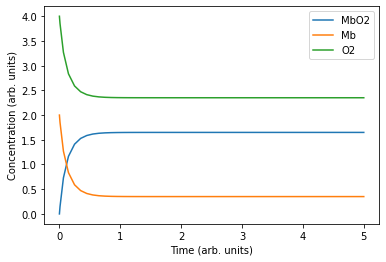

In [3]:
# Split up the solution matrix
t = solution.t
MbO2, Mb, O2 = solution.y

# Plot the solutions
plt.plot(t, MbO2, label="MbO2")
plt.plot(t, Mb, label="Mb")
plt.plot(t, O2, label="O2")

# Prettify the figure
plt.xlabel('Time (arb. units)')
plt.ylabel('Concentration (arb. units)')
plt.legend()

# Show the figure
plt.show()

**Exercise 1d) Checking whether the system is in equilibrium**

Note that we use `np.isclose` to compare floating point numbers, as a direction comparison (`LHS == Kd`) can quickly become false due to round-off errors.

In [4]:
LHS = Mb[-1]*O2[-1]/MbO2[-1]
Kd = km/kp

print(f"Kd = {Kd:.2f}")
print(f"At end of solution: [Mb][O2]/[MbO2] = {LHS:.2f}")

if np.isclose(LHS, Kd):
    print("The system is at equilibrium at end of simulation")
else:
    print("The system is not at equilibrium at end of simulation")

Kd = 0.50
At end of solution: [Mb][O2]/[MbO2] = 0.50
The system is at equilibrium at end of simulation


<a id='kinetics'></a>
## Exercise 2: Modeling Michaelis-Menten Kinetics

$${\rm S} + {\rm E} \underset{k_{-1}}{\overset{k_1}{\rightleftharpoons}} {\rm ES} \overset{k_2}{\rightarrow} {\rm E} + {\rm P}.$$

**Exercise 2a) Write out the ODEs**

Applying the law of mass action isn't all that complicated, but it is very easy to make trivial mistakes. Be careful to take it one term at the time, and double check you are writing the correct parameters, states and signs for each term. Any tiny error here will cascade into your code and therefore give the wrong solutions.

\begin{align}
\frac{\rm d[S]}{{\rm d}t} &= k_{-1}[{\rm ES}] - k_{1}[{\rm S}][{\rm E}], \\[0.5cm]
\frac{\rm d[E]}{{\rm d}t} &= k_{-1}[{\rm ES}] + k_2 [{\rm ES}] - k_{1}[{\rm S}][{\rm E}] = 
                             (k_{-1} + k_2)[{\rm ES}] - k_{1}[{\rm S}][{\rm E}], \\[0.5cm]
\frac{\rm d[ES]}{{\rm d}t} &= k_{1}[{\rm S}][{\rm E}] - (k_{-1} + k_2)[{\rm ES}], \\[0.5cm]
\frac{\rm d[P]}{{\rm d}t} &= k_2[{\rm ES}].
\end{align}



**Exercise 2b) Define the RHS function in Python**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rhs(t, y, k1p, k1m, k2):
    # Unpack the states
    S, E, ES, P = y
    
    # Compute derivatives
    dS_dt = k1m*ES - k1p*S*E
    dE_dt = (k1m + k2)*ES - k1p*S*E
    dES_dt = k1p*S*E - (k1m + k2)*ES
    dP_dt = k2*ES
    
    # Return RHS as sequence
    return [dS_dt, dE_dt, dES_dt, dP_dt]

**Exercise 2c) Call `solve_ivp`**

In [6]:
# Define time vector
time = (0, 30)

# Define initial condition vector
y0 = (1, 0.1, 0, 0)

# Define parameter vector
k1p = 1
k1m = 2
k2 = 3
params = (k1p, k1m, k2)

# Call the ODE solver
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.1)

**Exercise 2d) Plotting the solutions**

Now make two plots:
1. A plot of the substrate S and the product P
2. A plot of bound and free enzyme, SE and E

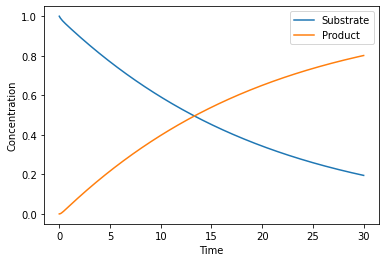

In [7]:
# Extract solution arrays
t = solution.t
S, E, ES, P = solution.y

# Plot 1
plt.plot(t, S, label='Substrate')
plt.plot(t, P, label='Product')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

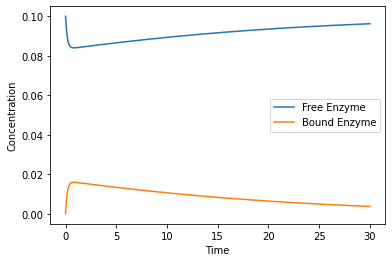

In [8]:
# Plot 2
plt.plot(t, E, label="Free Enzyme")
plt.plot(t, ES, label="Bound Enzyme")
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

**Exercise 2e) Verify mass conservation**

**Discussion:**
* The total amount of enzyme should not be affected by the reaction, as enzyme doesn't get used up. Enzyme in the system can be in one of two states: free or bound, therefore the sum $\rm [E] + [ES]$ *should* be constant.
* The substrate *can* be used up, but the way we have defined out reaction, it gets converted to product at a 1-to-1 rate, therefore the sum of the substrate and product should be constant over time. However, we need to remember that the substrate can be found either free or bounded, and thus it is actually $\rm [S] + [ES] + [P]$ which should be constant.

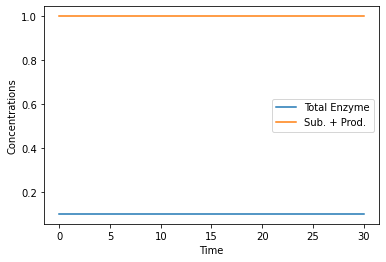

In [9]:
# Plot E + ES
plt.plot(t, E + ES, label="Total Enzyme")

# Plot S + ES + P
plt.plot(t, S + ES + P, label="Sub. + Prod.")

# Prettify the plot
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()

plt.show()

#### Exercise 2f) Comparing numerical results to the Michaelis-Menten equation

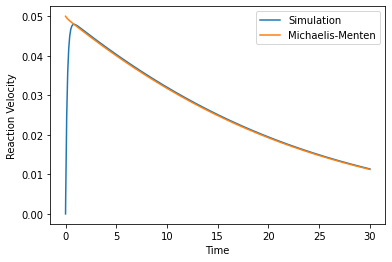

In [10]:
v_max = k2*(E[0] + ES[0])
Km = (k1m + k2)/k1p

v_sim = k2*ES
v_mm = v_max * S/(Km + S)

plt.plot(t, v_sim, label='Simulation')
plt.plot(t, v_mm, label='Michaelis-Menten')
plt.xlabel('Time')
plt.ylabel('Reaction Velocity')
plt.legend()
plt.show()

#### Exercise 2e) Explaining the difference

The reaction velocity starts high as there is a lot of substrate to convert, as time progresses the amount of total enzyme is constant, but the amount of substrate decreases resulting in lower overall reaction velocity. The fact that the reaction velocity drops right from the start indicates that the enzyme is not fully saturated, otherwise the reaction velocity should have stayed near constant in the beginning.

The two curves are very slightly different at the very start. This is because the simulation is based on the law of mass action alone, while the Michaelis-Menten assumed the system to be quasi-static, i.e., always at its equilibrium. We see that this assumption is poor right at the start of the simulation, because our initial conditions are far from equilibrium — however, we see the system very quick reaches its equilibrium and after this the simplified Michaelis-Menten equation is a very good approximation.
